## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


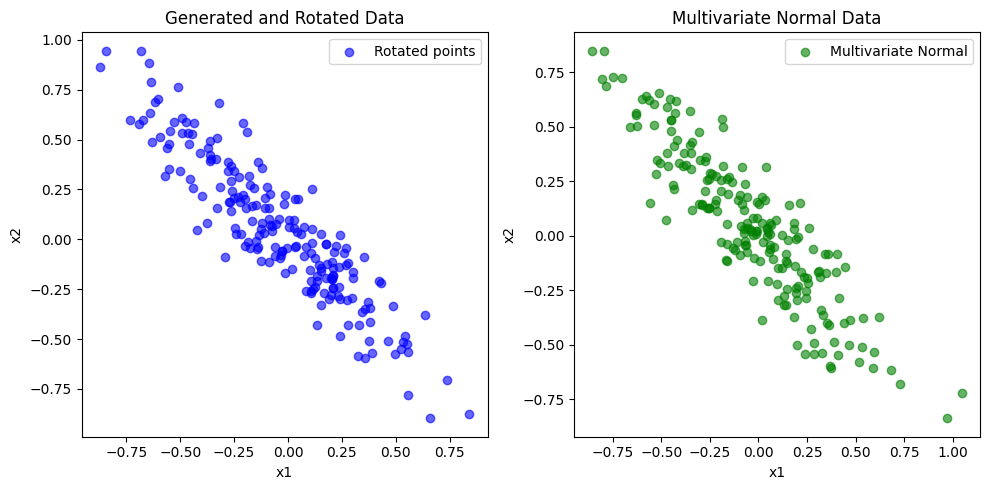

array([[ 0.11108257, -0.10902837],
       [-0.10902837,  0.12776482]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.pi / 4

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)], 
                            [np.sin(alpha), np.cos(alpha)]])
X_rotated = X @ rotation_matrix.T  # Поворот набора точек

cov_matrix = np.cov(X_rotated, rowvar=False)

mean = [0, 0]
cov = np.diag([sigma1**2, sigma2**2])
X_multivariate = np.random.multivariate_normal(mean, cov, M) @ rotation_matrix.T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], color='blue', alpha=0.6, label="Rotated points")
plt.title("Generated and Rotated Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], color='green', alpha=0.6, label="Multivariate Normal")
plt.title("Multivariate Normal Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.show()

# Выводим матрицу ковариации
cov_matrix


По графикам видно, что результат, полученный через поворот одномерных распределений, аналогичен результату, полученному с помощью этой встроенной функции.

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

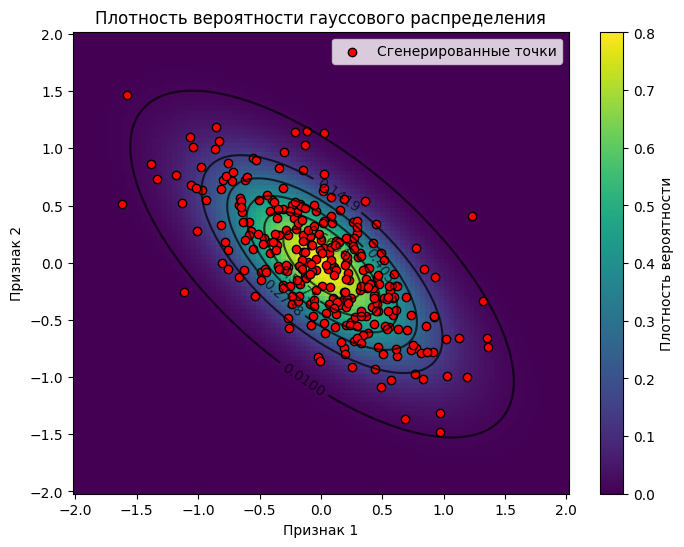

Среднее значение (mu): [ 0.00945997 -0.01181403]
Ковариационная матрица (C):
 [[ 0.27819259 -0.182965  ]
 [-0.182965    0.26209212]]


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)
M = 300
sigma1 = 0.3
sigma2 = 0.7
alpha = np.pi / 4 

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
X_rotated = X @ rotation_matrix.T

# Оценка среднего и ковариационной матрицы
mu = np.mean(X_rotated, axis=0)
cov_matrix = np.cov(X_rotated, rowvar=False)

# Определение плотности вероятности для гауссовского распределения
xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(xx, yy)
points = np.stack((XX.flatten(), YY.flatten()), axis=1)

rv = multivariate_normal(mean=mu, cov=cov_matrix)
pdf = rv.pdf(points).reshape(XX.shape)

plt.figure(figsize=(8, 6))

plt.pcolor(XX, YY, pdf, shading='auto')
plt.colorbar(label="Плотность вероятности")

CS = plt.contour(XX, YY, pdf, levels=np.linspace(0.01, pdf.max(), 7), colors='k', alpha=0.7)
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(X_rotated[:, 0], X_rotated[:, 1], color='red', edgecolor='black', label="Сгенерированные точки")
plt.title("Плотность вероятности гауссового распределения")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

print("Среднее значение (mu):", mu)
print("Ковариационная матрица (C):\n", cov_matrix)


По графику видно, что центральная область с более высокой плотностью соответствует областям, где наблюдается большее количество данных.

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью логарифмов левой и правой частей уравнения (4) (лучше упростить выражение). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

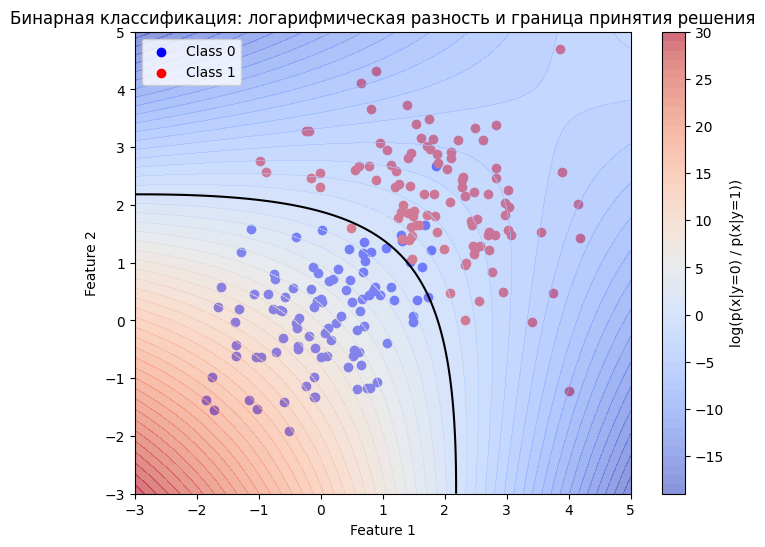

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Генерация случайного датасета для двух классов
np.random.seed(42)

# Класс 0: среднее и ковариация
mean_0 = [0, 0]
cov_0 = [[1, 0.5], [0.5, 1]]
data_0 = np.random.multivariate_normal(mean_0, cov_0, 100)

# Класс 1: среднее и ковариация
mean_1 = [2, 2]
cov_1 = [[1, -0.3], [-0.3, 1]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, 100)

# Объединение данных классов
X = np.vstack((data_0, data_1))
y = np.hstack((np.zeros(100), np.ones(100)))  # Метки: 0 для класса 0, 1 для класса 1

# Определение гауссовских распределений для каждого класса
dist_0 = multivariate_normal(mean=mean_0, cov=cov_0)
dist_1 = multivariate_normal(mean=mean_1, cov=cov_1)

# Создание сетки точек для оценки вероятностей
xx, yy = np.meshgrid(np.linspace(-3, 5, 100), np.linspace(-3, 5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисление правдоподобий (p(x|y)) для каждого класса
likelihood_0 = dist_0.pdf(grid_points).reshape(xx.shape)
likelihood_1 = dist_1.pdf(grid_points).reshape(xx.shape)

# Определение априорных вероятностей (предполагаем равные априори)
prior_0 = 0.5
prior_1 = 0.5

# Вычисление логарифмов апостериорных вероятностей для каждого класса
log_posterior_0 = np.log(likelihood_0 * prior_0)
log_posterior_1 = np.log(likelihood_1 * prior_1)

# Визуализация: построение датасета, разности логарифмов и разделяющей кривой
plt.figure(figsize=(8, 6))

# Построение точек датасета для каждого класса
plt.scatter(data_0[:, 0], data_0[:, 1], color='blue', label='Class 0')
plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Class 1')

# Построение фона: разность логарифмов апостериорных вероятностей
contourf = plt.contourf(xx, yy, log_posterior_0 - log_posterior_1, levels=50, cmap="coolwarm", alpha=0.6)

# Построение разделяющей кривой (разность логарифмов равна нулю)
plt.contour(xx, yy, log_posterior_0 - log_posterior_1, levels=[0], colors='black')

# Добавление colorbar для отображения значений фона
plt.colorbar(contourf, label="log(p(x|y=0) / p(x|y=1))")

plt.title("Бинарная классификация: логарифмическая разность и граница принятия решения")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


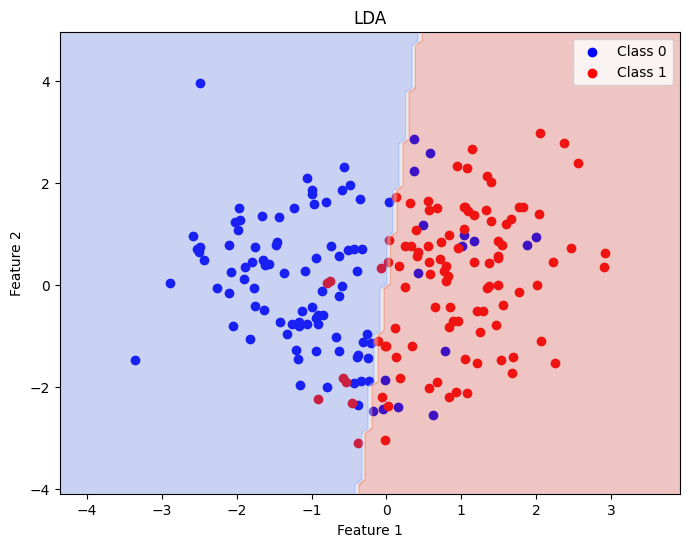

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification

# Реализация LDA
class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Разделение данных на классы
        self.classes_ = np.unique(y)
        self.mean_ = {}
        self.priors_ = {}
        
        # Считаем средние для каждого класса
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.mean_[cls] = np.mean(X_cls, axis=0)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]  # априорные вероятности
        
        # Общая ковариационная матрица (предполагаем одинаковые для всех классов)
        self.cov_ = np.cov(X, rowvar=False)
        self.cov_inv_ = np.linalg.inv(self.cov_)
    
    def predict(self, X):
        # Линейная дискриминантная функция для каждого класса
        discriminants = {}
        
        for cls in self.classes_:
            mean_vec = self.mean_[cls]
            prior = self.priors_[cls]
            
            # Вычисляем w^T x и b
            w = np.dot(self.cov_inv_, mean_vec)
            b = -0.5 * np.dot(np.dot(mean_vec.T, self.cov_inv_), mean_vec) + np.log(prior)
            
            discriminants[cls] = np.dot(X, w) + b
        
        # Присваиваем класс с максимальной дискриминантной функцией
        return np.argmax(np.array([discriminants[cls] for cls in self.classes_]), axis=0)

# Генерация случайного датасета для двух классов
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Обучение модели LDA
lda = myLDA()
lda.fit(X, y)

# Создаем сетку для визуализации
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Предсказания для каждого узла сетки
Z = lda.predict(grid).reshape(xx.shape)

# Визуализация данных и разделяющей поверхности
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.title('LDA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

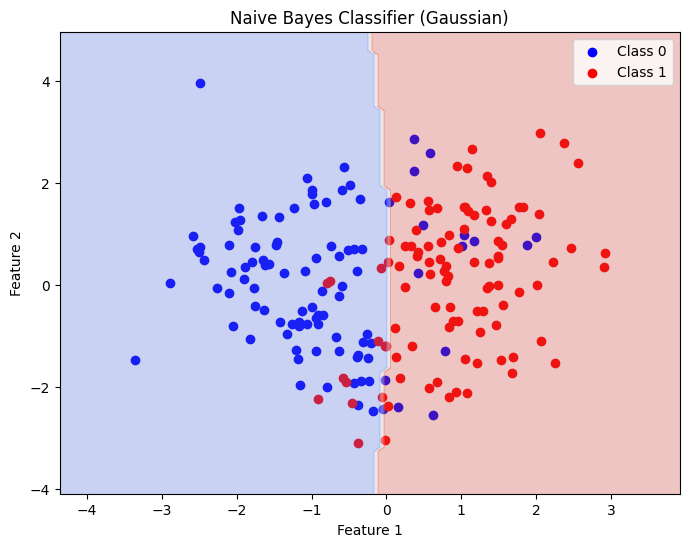

In [7]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Находим уникальные классы
        self.classes_ = np.unique(y)
        self.means_ = {}
        self.variances_ = {}
        self.priors_ = {}
        
        # Для каждого класса находим средние значения, дисперсии и априорные вероятности
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.variances_[cls] = np.var(X_cls, axis=0)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]
    
    def predict(self, X):
        # Для каждого класса вычисляем логарифм правдоподобия + логарифм априорной вероятности
        log_likelihoods = np.zeros((X.shape[0], len(self.classes_)))
        
        for idx, cls in enumerate(self.classes_):
            mean = self.means_[cls]
            variance = self.variances_[cls]
            prior = self.priors_[cls]
            
            # Правдоподобие с использованием одномерного гауссового распределения
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * variance))
            likelihood -= 0.5 * np.sum(((X - mean) ** 2) / (variance), axis=1)
            
            # Учет априорной вероятности
            log_likelihoods[:, idx] = likelihood + np.log(prior)
        
        # Присваиваем класс с максимальным логарифмом правдоподобия
        return self.classes_[np.argmax(log_likelihoods, axis=1)]

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
nb = myNB()
nb.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = nb.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.title('Naive Bayes Classifier (Gaussian)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

LDA - Accuracy: 0.8867, Precision: 0.9407, Recall: 0.8301
Naive Bayes - Accuracy: 0.8833, Precision: 0.9275, Recall: 0.8366


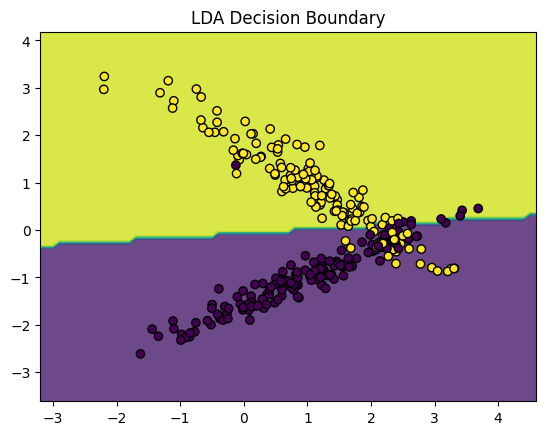

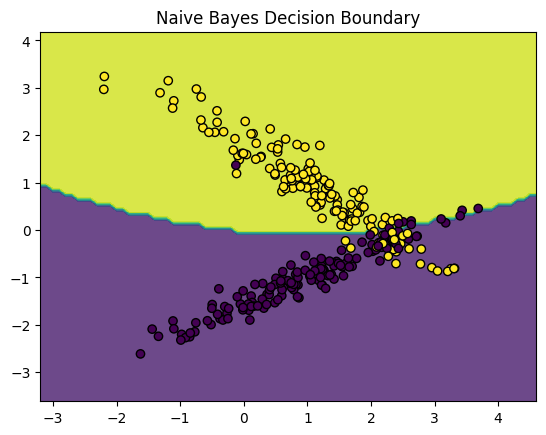

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Использование созданных ранее алгоритмов myLDA и myNB
class myLDA:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = {}
        self.priors_ = {}
        self.shared_cov_ = np.zeros((X.shape[1], X.shape[1]))
        
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]
            self.shared_cov_ += np.cov(X_cls, rowvar=False) * (X_cls.shape[0] - 1)
        
        self.shared_cov_ /= (X.shape[0] - len(self.classes_))
    
    def predict(self, X):
        discriminant_values = {}
        for cls in self.classes_:
            mean = self.means_[cls]
            prior = np.log(self.priors_[cls])
            inv_cov = np.linalg.inv(self.shared_cov_)
            discriminant_values[cls] = (prior - 0.5 * np.log(np.linalg.det(self.shared_cov_))
                                        - 0.5 * np.sum((X - mean) @ inv_cov * (X - mean), axis=1))
        
        return np.array([max(discriminant_values, key=lambda cls: discriminant_values[cls][i]) 
                         for i in range(X.shape[0])])

class myNB:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = {}
        self.variances_ = {}
        self.priors_ = {}
        
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.variances_[cls] = np.var(X_cls, axis=0)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]
    
    def predict(self, X):
        posterior_probs = {}
        for cls in self.classes_:
            mean = self.means_[cls]
            variance = self.variances_[cls]
            prior = np.log(self.priors_[cls])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * variance))
            likelihood -= 0.5 * np.sum(((X - mean) ** 2) / variance, axis=1)
            posterior_probs[cls] = prior + likelihood
        
        return np.array([max(posterior_probs, key=lambda cls: posterior_probs[cls][i]) 
                         for i in range(X.shape[0])])

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение LDA
lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Обучение Naive Bayes
nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Шаг 5: Вычисление метрик для LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

# Шаг 6: Вычисление метрик для Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Шаг 7: Вывод метрик
print(f"LDA - Accuracy: {accuracy_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}")

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test, y_test, lda, "LDA Decision Boundary")

plot_decision_boundary(X_test, y_test, nb, "Naive Bayes Decision Boundary")


В зависимости от структуры данных LDA может превосходить Naive Bayes, особенно если данные имеют линейно разделимые классы. Однако, если признаки действительно независимы, Naive Bayes может показать лучшие результаты.